# Looking At the Abeysuriya / Robinson Model

## Setup

In [1]:
# Generic stuff
import os,sys,numpy as np,pandas as pd
from scipy.io import loadmat


# Vizualization stuff

# Choose which setting; for widget, need to use %matplotlib notebook
%matplotlib notebook 
#%matplotlib inline 
from matplotlib import pyplot as plt

# Spectral models stuff

sys.path.append('../../code/')
from robinson import Abeysuriya2015Model

In [2]:
#from numpy import pi

## Interactive exporation with the widget

In [3]:
%matplotlib notebook

Default parameters

<IPython.core.display.Javascript object>


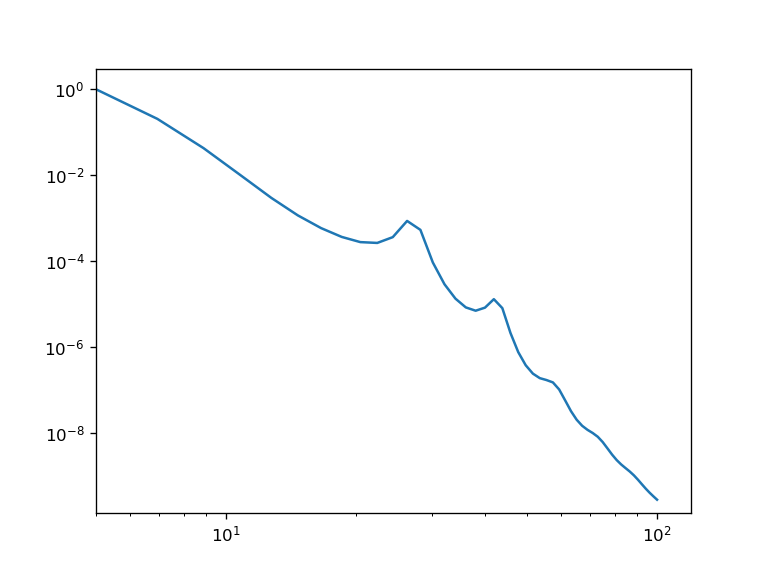

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT01LCBkZXNjcmlwdGlvbj11J0dfZWUnLCBtYXg9MjApLCBJbnRTbGlkZXIodmFsdWU9LTcsIGRlc2NyaXB0aW9uPXUnR19laSfigKY=


In [5]:
mod = Abeysuriya2015Model()
mod.plot_widget(logx=True,normalize=True)#,xrange=[0.,300])#,xrange=[0,60])#,logx=False)#,xrange=[0,60])

In [5]:
from ipywidgets import *


In [ ]:
widgets.FloatSlider

<IPython.core.display.Javascript object>


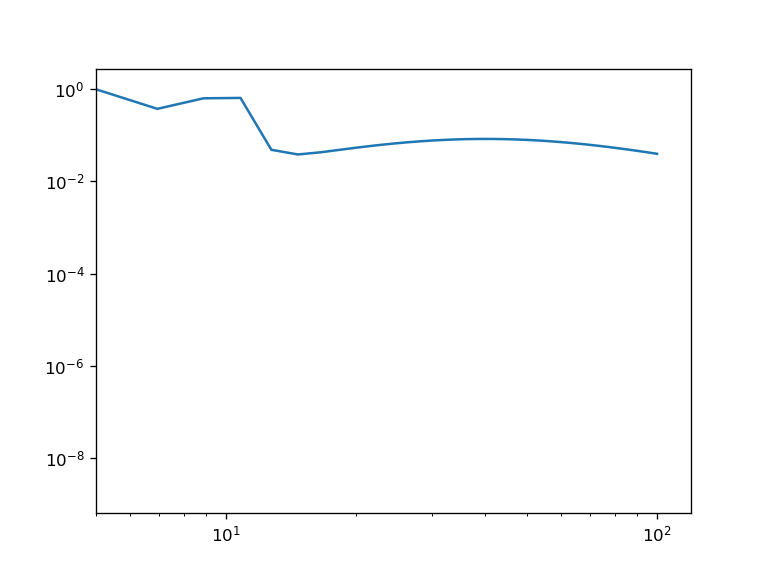

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTcuMCwgZGVzY3JpcHRpb249dSdHX2VlJywgbWF4PTIwLjAsIHN0ZXA9MS4wKSwgRmxvYXRTbGlkZXIodmFsdWU9LTI3LjDigKY=


In [7]:
newparams = dict(G_ee=7.,G_ei=-27.,G_ese=78.,G_esre=-22.,G_srs=-1.,
                alpha=25.,beta=600.)#,A_EMG=0.)#200.,beta=900,t=84.)
mod = Abeysuriya2015Model()#freqs=freqs)
for k,v in newparams.items(): setattr(mod,k,v)    
mod.plot_widget(logx=True,normalize=True)#,xrange=[0.,300])#,xrange=[0,60])#,logx=False)#,xrange=[0,60])
#mod.widg_ax.set_xlim([10E-3,10E-0])

Params giving an alpha peak

<IPython.core.display.Javascript object>


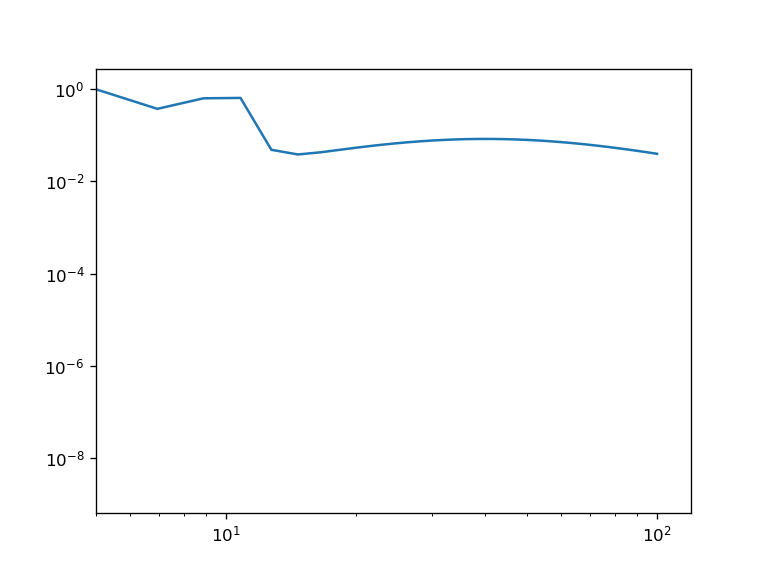

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTcuMCwgZGVzY3JpcHRpb249dSdHX2VlJywgbWF4PTIwLjAsIHN0ZXA9MS4wKSwgRmxvYXRTbGlkZXIodmFsdWU9LTI3LjDigKY=


In [9]:
newparams = dict(G_ee=7.,G_ei=-27.,G_ese=78.,G_esre=-22.,G_srs=-1.,
                alpha=25.,beta=600.)#200.,beta=900,t=84.)
mod = Abeysuriya2015Model()
for k,v in newparams.items(): setattr(mod,k,v)    
mod.plot_widget(logx=True,normalize=True)#,xrange=[0.,300])#,xrange=[0,60])#,logx=False)#,xrange=[0,60])


In [37]:
%matplotlib inline

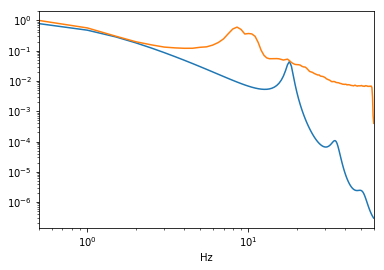

In [60]:
fig, ax = plt.subplots()
mod.compute_P(mod.freqs,return_df=True,normalize=True)['P_EEG_EMG'].loc[:60].plot(logx=True,logy=True,xlim=[1,80],ax=ax)
fit_df.loc[:60].data.plot(ax=ax,logy=True,logx=True)

In [52]:
fit_df.shape

(301, 4)

In [53]:
mod.freqs

array([  5.        ,   6.93877551,   8.87755102,  10.81632653,
        12.75510204,  14.69387755,  16.63265306,  18.57142857,
        20.51020408,  22.44897959,  24.3877551 ,  26.32653061,
        28.26530612,  30.20408163,  32.14285714,  34.08163265,
        36.02040816,  37.95918367,  39.89795918,  41.83673469,
        43.7755102 ,  45.71428571,  47.65306122,  49.59183673,
        51.53061224,  53.46938776,  55.40816327,  57.34693878,
        59.28571429,  61.2244898 ,  63.16326531,  65.10204082,
        67.04081633,  68.97959184,  70.91836735,  72.85714286,
        74.79591837,  76.73469388,  78.67346939,  80.6122449 ,
        82.55102041,  84.48979592,  86.42857143,  88.36734694,
        90.30612245,  92.24489796,  94.18367347,  96.12244898,
        98.06122449, 100.        ])

      fun: 290.9702248306202
 hess_inv: <9x9 LbfgsInvHessProduct with dtype=float64>
      jac: array([-2.93455855e+00, -3.50732989e+00, -1.37578127e+00, -1.34405695e+00,
       -3.98138695e+01, -6.52335075e-02, -2.79101187e-03,  5.81278755e+01,
       -1.07334358e+06])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 70
      nit: 1
   status: 0
  success: True
        x: array([ 7.00061949e+00, -2.69992298e+01,  7.80003033e+01, -2.19997090e+01,
       -9.94965951e-01,  2.00000000e+02,  7.00000001e+02,  8.39918496e+01,
        5.00119858e-13])
CPU times: user 1min 5s, sys: 828 ms, total: 1min 6s
Wall time: 1min 11s


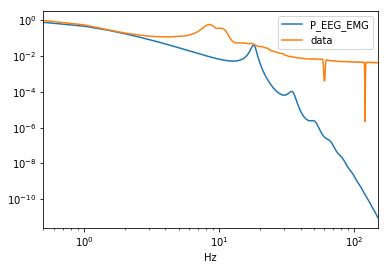

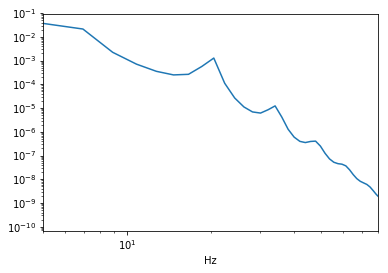

In [45]:
%%time
newparams = dict(G_ee=7.,G_ei=-27.,G_ese=78.,G_esre=-22.,G_srs=-1.,
                alpha=200.,beta=700,t=84.)
mod = Abeysuriya2015Model()
for k,v in newparams.items(): setattr(mod,k,v)    
fit_res,fit_df = mod.fit(data,freqs,param_list,5.,normalize=True,fit_log=True)# alse)#True)
print(fit_res)

fig, ax = plt.subplots()
fit_df[['P_EEG_EMG', 'data']].plot(logx=True,logy=True,ax=ax)

fig, ax = plt.subplots()
mod.compute_P(mod.freqs,return_df=True)['P_EEG_EMG'].plot(logx=True,logy=True,xlim=[5,80],ax=ax)

      fun: 290.9702248306202
 hess_inv: <9x9 LbfgsInvHessProduct with dtype=float64>
      jac: array([-2.93455855e+00, -3.50732989e+00, -1.37578127e+00, -1.34405695e+00,
       -3.98138695e+01, -6.52335075e-02, -2.79101187e-03,  5.81278755e+01,
       -1.07334358e+06])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 70
      nit: 1
   status: 0
  success: True
        x: array([ 7.00061949e+00, -2.69992298e+01,  7.80003033e+01, -2.19997090e+01,
       -9.94965951e-01,  2.00000000e+02,  7.00000001e+02,  8.39918496e+01,
        5.00119858e-13])
CPU times: user 1min 4s, sys: 719 ms, total: 1min 5s
Wall time: 1min 8s


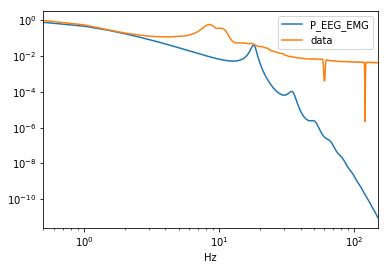

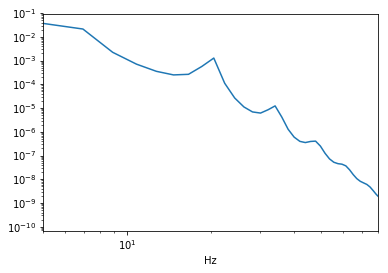

In [46]:
%%time
newparams = dict(G_ee=7.,G_ei=-27.,G_ese=78.,G_esre=-22.,G_srs=-1.,
                alpha=200.,beta=700,t=84.)
mod = Abeysuriya2015Model()
for k,v in newparams.items(): setattr(mod,k,v)    
fit_res,fit_df = mod.fit(data,freqs,param_list,0.1,normalize=True,fit_log=True)# alse)#True)
print(fit_res)

fig, ax = plt.subplots()
fit_df[['P_EEG_EMG', 'data']].plot(logx=True,logy=True,ax=ax)

fig, ax = plt.subplots()
mod.compute_P(mod.freqs,return_df=True)['P_EEG_EMG'].plot(logx=True,logy=True,xlim=[5,80],ax=ax)

Compute + plot power spectrum with specified parameters

<IPython.core.display.Javascript object>


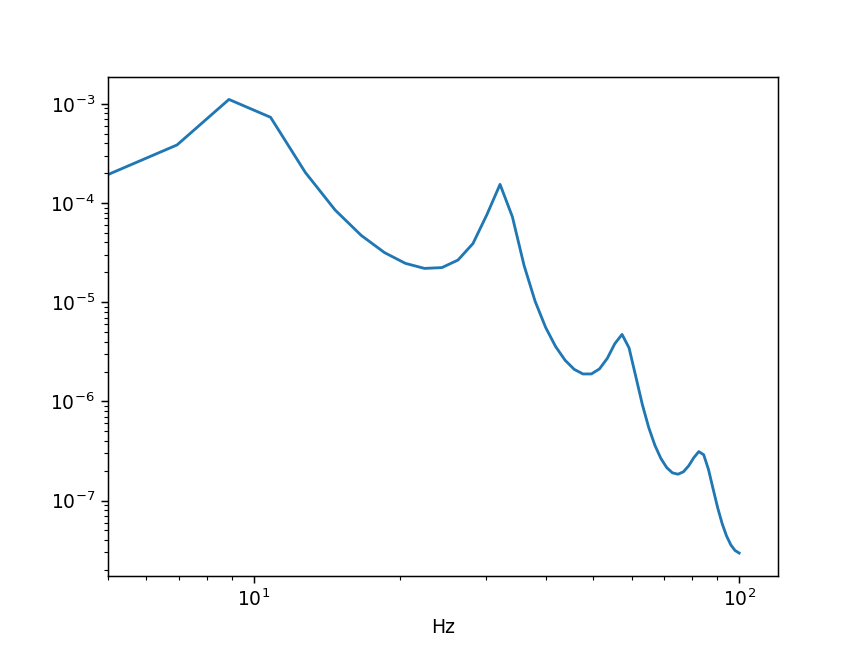

In [3]:
plt.figure()
mod = Abeysuriya2015Model()
mod.G_ee = 11.
mod.G_ei = -9.
mod.G_ese = 8.
mod.compute_P(mod.freqs,return_df=True)['P_EEG_EMG'].plot(logx=True,logy=True,xlim=[5,120])

## Observations on model parameter effects

In [19]:
# (to do...)

## Fitting

In [10]:
mat = loadmat('../../scratch/100307_MEG_3-Restin_powavg.mat',struct_as_record=False,squeeze_me=True)['freq']

hcp_ps = pd.DataFrame(mat.powspctrm,columns=mat.freq,index=mat.label).T

data = hcp_ps.mean(axis=1).values
freqs = hcp_ps.index.values

data_mul = (hcp_ps.mean(axis=1).values*10**24).astype(float)

param_list = ['G_ee','G_ei','G_ese','G_esre','G_srs',
              'alpha','beta','t0','A_EMG']
       

In [11]:
%matplotlib inline

Non-normalized power spectrum

      fun: 5357.946285073562
 hess_inv: <9x9 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 4.27462510e-03,  3.21051630e-02, -1.81898940e-04, -3.63797881e-04,
        3.45607987e-03, -9.09494702e-05,  0.00000000e+00, -3.81987775e-03,
        1.02987452e+09])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 20
      nit: 1
   status: 0
  success: True
        x: array([2.00000000e+01, 0.00000000e+00, 2.00000000e+02, 1.00000000e+02,
       2.00000000e+01, 1.00000000e+01, 5.99982537e+02, 5.00000000e+01,
       1.00000000e-05])
CPU times: user 23.8 s, sys: 625 ms, total: 24.4 s
Wall time: 27.3 s


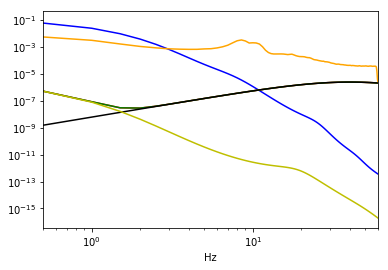

In [17]:
%%time

newparams = dict(G_ee=7.,G_ei=-27.,G_ese=78.,G_esre=-22.,G_srs=-1.,
                alpha=25.,beta=600.)#200.,beta=900,t=84.)
fit_mod = Abeysuriya2015Model()#freqs=freqs)
for k,v in newparams.items(): setattr(fit_mod,k,v)    
fit_mod.freqs = freqs
fit_mod.data = data_mul
    
fig, ax = plt.subplots()#ncols=2, figsize=(12,3))
fit_mod.compute_P(fit_mod.freqs,return_df=True,normalize=False)['P_EEG_EMG'].loc[:60].plot(logx=True,logy=True,ax=ax,c='b')

fit_res,fit_df = fit_mod.fit(data_mul,freqs,param_list,0.1,normalize=False)# alse)#True)

print(fit_res)

fit_mod.compute_P(fit_mod.freqs,return_df=True,normalize=False)['P_EEG_EMG'].loc[:60].plot(logx=True,logy=True,ax=ax,c='r')

#fit_df.loc[:60].data.plot(ax=ax,logy=True,logx=True)
fit_df['P_EEG_EMG'].loc[:60].plot(logx=True,logy=True,ax=ax,c='g')
fit_df['data'].loc[:60].plot(logx=True,logy=True,ax=ax,c='orange')
fit_df['P_EMG'].loc[:60].plot(logx=True,logy=True,ax=ax,c='k')
fit_df['P_EEG'].loc[:60].plot(logx=True,logy=True,ax=ax,c='y')


      fun: 5357.946285073562
 hess_inv: <9x9 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 4.27462510e-03,  3.21051630e-02, -1.81898940e-04, -3.63797881e-04,
        3.45607987e-03, -9.09494702e-05,  0.00000000e+00, -3.81987775e-03,
        1.02987452e+09])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 20
      nit: 1
   status: 0
  success: True
        x: array([2.00000000e+01, 0.00000000e+00, 2.00000000e+02, 1.00000000e+02,
       2.00000000e+01, 1.00000000e+01, 5.99982537e+02, 5.00000000e+01,
       1.00000000e-05])
CPU times: user 20.4 s, sys: 250 ms, total: 20.7 s
Wall time: 21.4 s


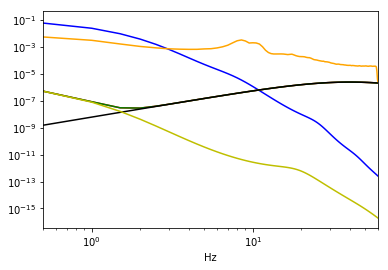

In [18]:
%%time

newparams = dict(G_ee=7.,G_ei=-27.,G_ese=78.,G_esre=-22.,G_srs=-1.,
                alpha=25.,beta=600.,A_EMG=0.)#200.,beta=900,t=84.)
fit_mod = Abeysuriya2015Model()#freqs=freqs)
for k,v in newparams.items(): setattr(fit_mod,k,v)    
fit_mod.freqs = freqs
fit_mod.data = data_mul
    
fig, ax = plt.subplots()#ncols=2, figsize=(12,3))
fit_mod.compute_P(fit_mod.freqs,return_df=True,normalize=False)['P_EEG_EMG'].loc[:60].plot(logx=True,logy=True,ax=ax,c='b')

fit_res,fit_df = fit_mod.fit(data_mul,freqs,param_list,0.1,normalize=False)# alse)#True)

print(fit_res)

fit_mod.compute_P(fit_mod.freqs,return_df=True,normalize=False)['P_EEG_EMG'].loc[:60].plot(logx=True,logy=True,ax=ax,c='r')

#fit_df.loc[:60].data.plot(ax=ax,logy=True,logx=True)
fit_df['P_EEG_EMG'].loc[:60].plot(logx=True,logy=True,ax=ax,c='g')
fit_df['data'].loc[:60].plot(logx=True,logy=True,ax=ax,c='orange')
fit_df['P_EMG'].loc[:60].plot(logx=True,logy=True,ax=ax,c='k')
fit_df['P_EEG'].loc[:60].plot(logx=True,logy=True,ax=ax,c='y')


Normalized power spectrum

      fun: 320.5065132598005
 hess_inv: <9x9 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.99918304e-01, -2.04005346e-01, -7.82222287e-02, -8.07915512e-02,
       -1.69234227e+00, -3.01270120e-04,  0.00000000e+00,  3.23268523e-02,
       -2.85747440e+03])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 40
      nit: 1
   status: 0
  success: True
        x: array([ 6.79866251e+00, -2.73099860e+01,  7.78975077e+01, -2.21696853e+01,
       -1.55391057e+00,  2.50045380e+01,  6.00000006e+02,  8.52816789e+01,
        1.00000000e-05])
CPU times: user 39 s, sys: 828 ms, total: 39.8 s
Wall time: 43.1 s


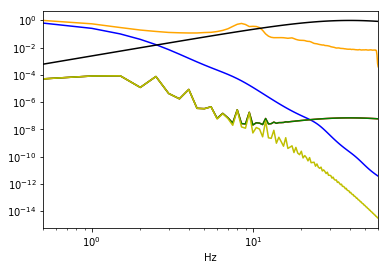

In [16]:
%%time

newparams = dict(G_ee=7.,G_ei=-27.,G_ese=78.,G_esre=-22.,G_srs=-1.,
                alpha=25.,beta=600.)#200.,beta=900,t=84.)
fit_mod = Abeysuriya2015Model()#freqs=freqs)
for k,v in newparams.items(): setattr(fit_mod,k,v)    
fit_mod.freqs = freqs
fit_mod.data = data
    
fig, ax = plt.subplots()#ncols=2, figsize=(12,3))
fit_mod.compute_P(fit_mod.freqs,return_df=True,normalize=True)['P_EEG_EMG'].loc[:60].plot(logx=True,logy=True,ax=ax,c='b')

fit_res,fit_df = fit_mod.fit(data,freqs,param_list,0.1,normalize=True)# alse)#True)

print(fit_res)

fit_mod.compute_P(fit_mod.freqs,return_df=True,normalize=True)['P_EEG_EMG'].loc[:60].plot(logx=True,logy=True,ax=ax,c='r')

#fit_df.loc[:60].data.plot(ax=ax,logy=True,logx=True)
fit_df['P_EEG_EMG'].loc[:60].plot(logx=True,logy=True,ax=ax,c='g')
fit_df['data'].loc[:60].plot(logx=True,logy=True,ax=ax,c='orange')
fit_df['P_EMG'].loc[:60].plot(logx=True,logy=True,ax=ax,c='k')
fit_df['P_EEG'].loc[:60].plot(logx=True,logy=True,ax=ax,c='y')


Fit less data

      fun: 73.7506414213144
 hess_inv: <9x9 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.39680338e+00, -2.05850483e+00, -6.92624269e-01, -1.12456036e+00,
       -1.52532778e+01, -9.25581389e-02, -1.23634436e-04,  2.03663859e+00,
       -5.31029978e+03])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 30
      nit: 1
   status: 0
  success: True
        x: array([ 7.00420678e+00, -2.69960547e+01,  7.80015630e+01, -2.19980262e+01,
       -9.47677763e-01,  2.50013447e+01,  6.00000002e+02,  8.43797994e+01,
        8.73810947e-04])
CPU times: user 14.3 s, sys: 219 ms, total: 14.5 s
Wall time: 16.5 s


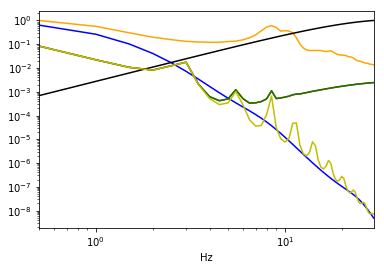

In [19]:
%%time

newparams = dict(G_ee=7.,G_ei=-27.,G_ese=78.,G_esre=-22.,G_srs=-1.,
                alpha=25.,beta=600.)#200.,beta=900,t=84.)
fit_mod = Abeysuriya2015Model()#freqs=freqs)
for k,v in newparams.items(): setattr(fit_mod,k,v)    
fit_mod.freqs = freqs[:60]
fit_mod.data = data[:60]
    
fig, ax = plt.subplots()#ncols=2, figsize=(12,3))
fit_mod.compute_P(fit_mod.freqs,return_df=True,normalize=True)['P_EEG_EMG'].loc[:60].plot(logx=True,logy=True,ax=ax,c='b')

fit_res,fit_df = fit_mod.fit(data[:60],freqs[:60],param_list,0.1,normalize=True)# alse)#True)

print(fit_res)

fit_mod.compute_P(fit_mod.freqs,return_df=True,normalize=True)['P_EEG_EMG'].loc[:60].plot(logx=True,logy=True,ax=ax,c='r')

#fit_df.loc[:60].data.plot(ax=ax,logy=True,logx=True)
fit_df['P_EEG_EMG'].loc[:60].plot(logx=True,logy=True,ax=ax,c='g')
fit_df['data'].loc[:60].plot(logx=True,logy=True,ax=ax,c='orange')
fit_df['P_EMG'].loc[:60].plot(logx=True,logy=True,ax=ax,c='k')
fit_df['P_EEG'].loc[:60].plot(logx=True,logy=True,ax=ax,c='y')


      fun: 47.42631527248117
 hess_inv: <9x9 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.93423233e-01, -3.00082093e-01, -1.06749809e-01, -6.11350970e-02,
        8.04894285e-01, -1.49888280e-01, -2.77111667e-05, -4.60643435e-01,
       -3.96224209e-01])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 950
      nit: 65
   status: 0
  success: True
        x: array([ 7.00641510e+00, -2.70831587e+01,  7.79732723e+01, -2.19813776e+01,
       -3.34936958e-02,  2.48932678e+01,  6.00000180e+02,  8.44431830e+01,
        9.93747228e-02])
CPU times: user 6min 10s, sys: 4.73 s, total: 6min 15s
Wall time: 6min 42s


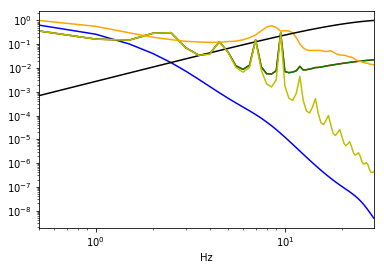

In [20]:
%%time

newparams = dict(G_ee=7.,G_ei=-27.,G_ese=78.,G_esre=-22.,G_srs=-1.,
                alpha=25.,beta=600.)#200.,beta=900,t=84.)
fit_mod = Abeysuriya2015Model()#freqs=freqs)
for k,v in newparams.items(): setattr(fit_mod,k,v)    
fit_mod.freqs = freqs[:60]
fit_mod.data = data[:60]
    
fig, ax = plt.subplots()#ncols=2, figsize=(12,3))
fit_mod.compute_P(fit_mod.freqs,return_df=True,normalize=True)['P_EEG_EMG'].loc[:60].plot(logx=True,logy=True,ax=ax,c='b')

fit_res,fit_df = fit_mod.fit(data[:60],freqs[:60],param_list,1E-6,normalize=True)# alse)#True)

print(fit_res)

fit_mod.compute_P(fit_mod.freqs,return_df=True,normalize=True)['P_EEG_EMG'].loc[:60].plot(logx=True,logy=True,ax=ax,c='r')

#fit_df.loc[:60].data.plot(ax=ax,logy=True,logx=True)
fit_df['P_EEG_EMG'].loc[:60].plot(logx=True,logy=True,ax=ax,c='g')
fit_df['data'].loc[:60].plot(logx=True,logy=True,ax=ax,c='orange')
fit_df['P_EMG'].loc[:60].plot(logx=True,logy=True,ax=ax,c='k')
fit_df['P_EEG'].loc[:60].plot(logx=True,logy=True,ax=ax,c='y')


      fun: 47.426315272477645
 hess_inv: <9x9 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.93428917e-01, -3.00092040e-01, -1.06754072e-01, -6.11386497e-02,
        8.05332689e-01, -1.49891832e-01, -3.05533376e-05, -4.60603644e-01,
       -3.96308053e-01])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 970
      nit: 66
   status: 0
  success: True
        x: array([ 7.00641510e+00, -2.70831587e+01,  7.79732723e+01, -2.19813776e+01,
       -3.34936925e-02,  2.48932678e+01,  6.00000180e+02,  8.44431830e+01,
        9.93747235e-02])
CPU times: user 6min 5s, sys: 3.83 s, total: 6min 9s
Wall time: 6min 27s


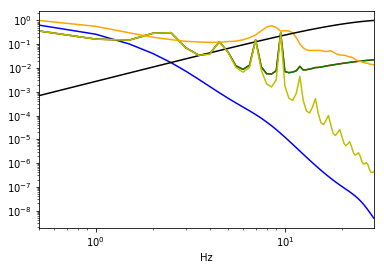

In [21]:
%%time

newparams = dict(G_ee=7.,G_ei=-27.,G_ese=78.,G_esre=-22.,G_srs=-1.,
                alpha=25.,beta=600.)#200.,beta=900,t=84.)
fit_mod = Abeysuriya2015Model()#freqs=freqs)
for k,v in newparams.items(): setattr(fit_mod,k,v)    
fit_mod.freqs = freqs[:60]
fit_mod.data = data[:60]
    
fig, ax = plt.subplots()#ncols=2, figsize=(12,3))
fit_mod.compute_P(fit_mod.freqs,return_df=True,normalize=True)['P_EEG_EMG'].loc[:60].plot(logx=True,logy=True,ax=ax,c='b')

fit_res,fit_df = fit_mod.fit(data[:60],freqs[:60],param_list,1E-10,normalize=True)# alse)#True)

print(fit_res)

fit_mod.compute_P(fit_mod.freqs,return_df=True,normalize=True)['P_EEG_EMG'].loc[:60].plot(logx=True,logy=True,ax=ax,c='r')

#fit_df.loc[:60].data.plot(ax=ax,logy=True,logx=True)
fit_df['P_EEG_EMG'].loc[:60].plot(logx=True,logy=True,ax=ax,c='g')
fit_df['data'].loc[:60].plot(logx=True,logy=True,ax=ax,c='orange')
fit_df['P_EMG'].loc[:60].plot(logx=True,logy=True,ax=ax,c='k')
fit_df['P_EEG'].loc[:60].plot(logx=True,logy=True,ax=ax,c='y')
